In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [2]:
url = 'https://raw.githubusercontent.com/Condori-Carlos/Challenge_TelecomX_part2/refs/heads/main/Data/datos_tratados.csv'
datos = pd.read_csv(url)

In [3]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [4]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Charges.daily'],
      dtype='object')

In [5]:
datos = datos.drop(columns=['customerID'])



####**Verificar correlación entre posibles columnas redundantes**

In [6]:
# Verificar correlación entre posibles columnas redundantes
datos[['Charges.Monthly', 'Charges.Total', 'tenure', 'Charges.daily']].corr()

,Charges.Monthly,Charges.Total,tenure,Charges.daily
Charges.Monthly,1.000000,0.651065,0.24790,1.000000
Charges.Total,0.651065,1.000000,0.82588,0.651065
tenure,0.247900,0.825880,1.00000,0.247900
Charges.daily,1.000000,0.651065,0.24790,1.000000


In [7]:
# Código para eliminar columna redundante
datos = datos.drop(columns=['Charges.daily'])

In [8]:
##Verificar cuántos NaN hay en Churn

print(datos['Churn'].isna().sum())



0


In [9]:
datos = datos.dropna(subset=['Churn'])


###**Encoding**

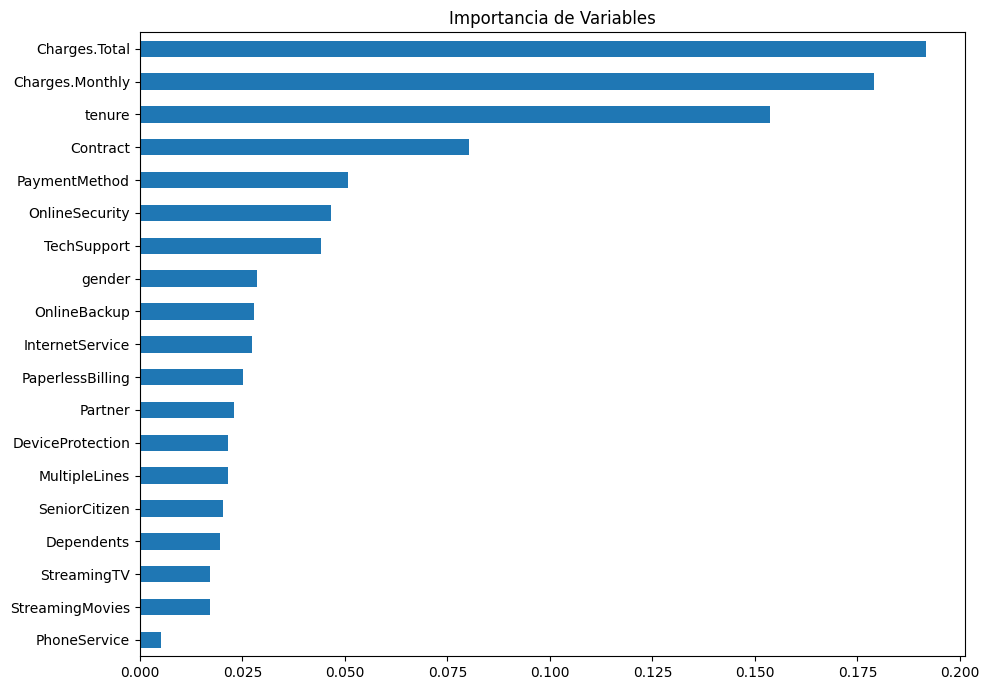

In [10]:
# Codificar variables categóricas (excluyendo 'Churn')
for col in datos.select_dtypes(include='object').columns:
    if col != 'Churn':
        datos[col] = LabelEncoder().fit_transform(datos[col])

#  Separar características y objetivo
X = datos.drop('Churn', axis=1)
y = datos['Churn']

# Drop rows with NaN in y and corresponding rows in X
nan_indices = y[y.isna()].index
X = X.drop(nan_indices)
y = y.drop(nan_indices)


#  Entrenar Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

#  Graficar importancia de variables
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 7), title='Importancia de Variables')
plt.tight_layout()
plt.show()

In [11]:
datos

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,0,0,1,1,9,1,0,0,0,2,0,2,2,0,1,1,3,65.60,593.30
1,0,1,0,0,0,9,1,2,0,0,0,0,0,0,2,0,0,3,59.90,542.40
2,1,1,0,0,0,4,1,0,1,0,0,2,0,0,0,0,1,2,73.90,280.85
3,1,1,1,1,0,13,1,0,1,0,2,2,0,2,2,0,1,2,98.00,1237.85
4,1,0,1,1,0,3,1,0,1,0,0,0,2,2,0,0,1,3,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,0,2,0,0,2,0,0,1,0,3,55.15,742.90
7039,1,1,0,1,0,22,1,2,1,0,0,0,0,0,2,0,1,2,85.10,1873.70
7040,0,1,0,0,0,2,1,0,0,0,2,0,0,0,0,0,1,3,50.30,92.75
7041,0,1,0,1,1,67,1,0,0,2,0,2,2,0,2,2,0,3,67.85,4627.65


###**Verificación de la Proporción de Cancelación (Churn)**

In [12]:
# Recuento total
print("Distribución de Churn (conteo):")
print(datos['Churn'].value_counts())




Distribución de Churn (conteo):
Churn
0    5174
1    1869
Name: count, dtype: int64


In [13]:
# Proporción (porcentaje)
print("\nProporción de Churn (%):")
print(datos['Churn'].value_counts(normalize=True) * 100)


Proporción de Churn (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


###**Balanceo de Clases**

In [14]:
from imblearn.under_sampling import RandomUnderSampler

X = datos.drop('Churn', axis=1)
y = datos['Churn']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print("Distribución después de undersampling:")
print(y_res.value_counts())


Distribución después de undersampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print("Distribución después de oversampling:")
print(y_res.value_counts())


Distribución después de oversampling:
Churn
0    5174
1    5174
Name: count, dtype: int64


In [16]:
X = datos.drop('Churn', axis=1)
y = datos['Churn']

# Eliminar filas con NaN
X = X.dropna()
y = y.loc[X.index]  # sincronizar índices

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribución después de SMOTE:")
print(y_res.value_counts())


Distribución después de SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribución después de SMOTE:")
print(y_res.value_counts())


Distribución después de SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [18]:
print(datos.describe())


             Churn       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean      0.265370     0.504756       0.162147     0.483033     0.299588   
std       0.441561     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.940508         0.872923   
std      24.559481      0.295752       0.948554         0.737796   
min       0.000000      0.000000       0.00

In [19]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)


In [20]:
y_balanceada.value_counts(normalize=True)


,proportion
Churn,
0,0.5
1,0.5


###**visualizar la matriz de correlación**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


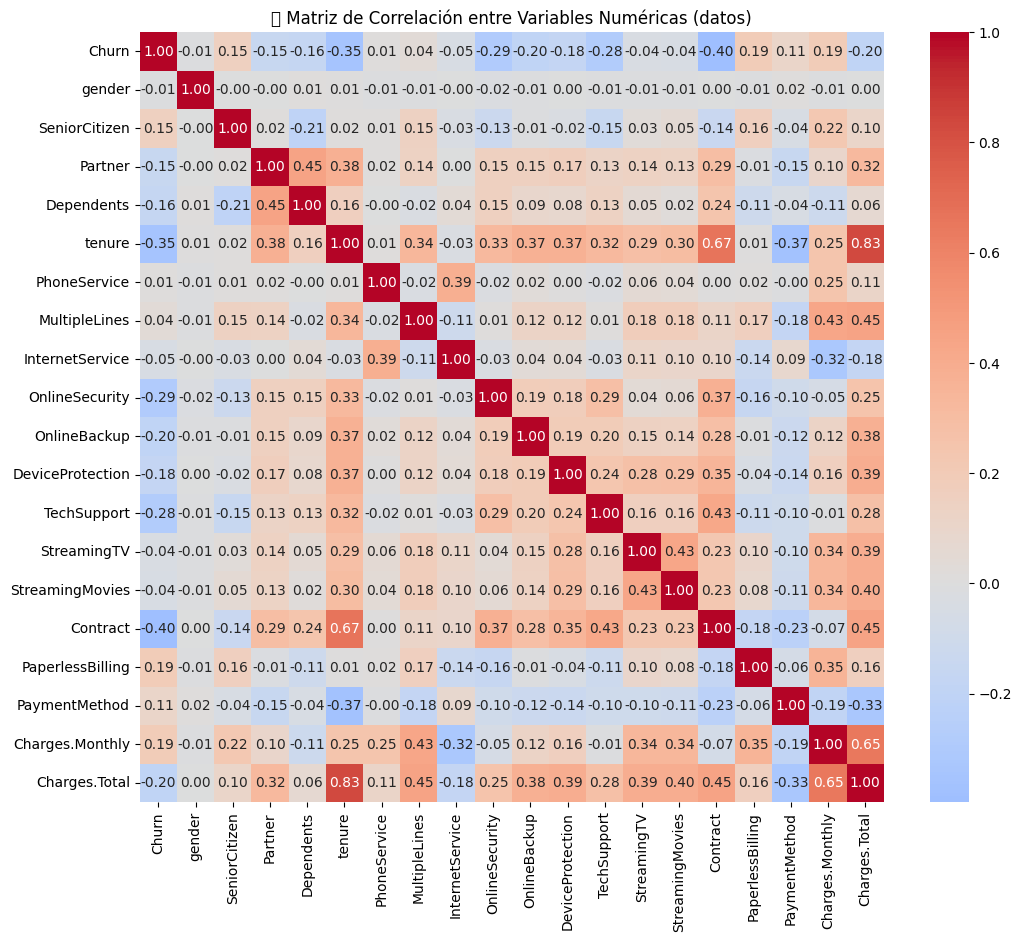

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

datos_numericos = datos.select_dtypes(include=['int64', 'float64'])

matriz_corr = datos_numericos.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("🔍 Matriz de Correlación entre Variables Numéricas (datos)")
plt.show()



###**Análisis Dirigido**

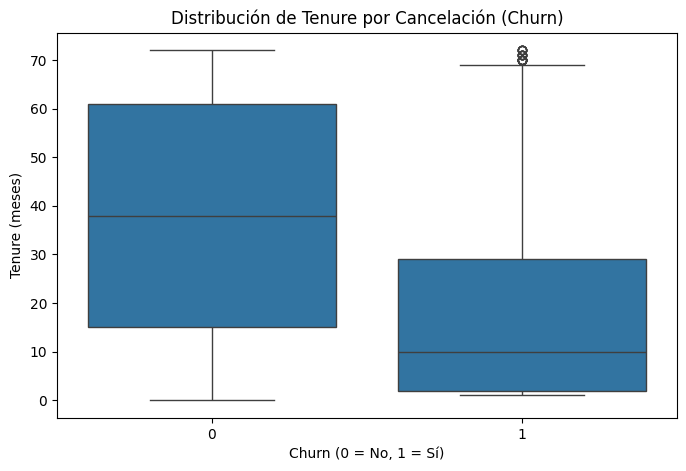

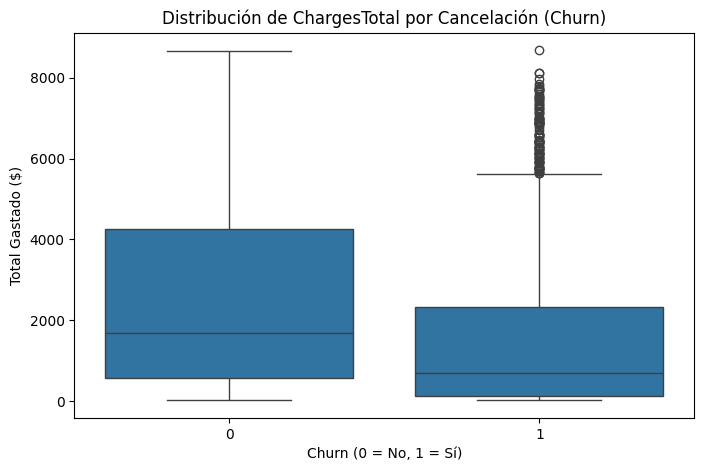

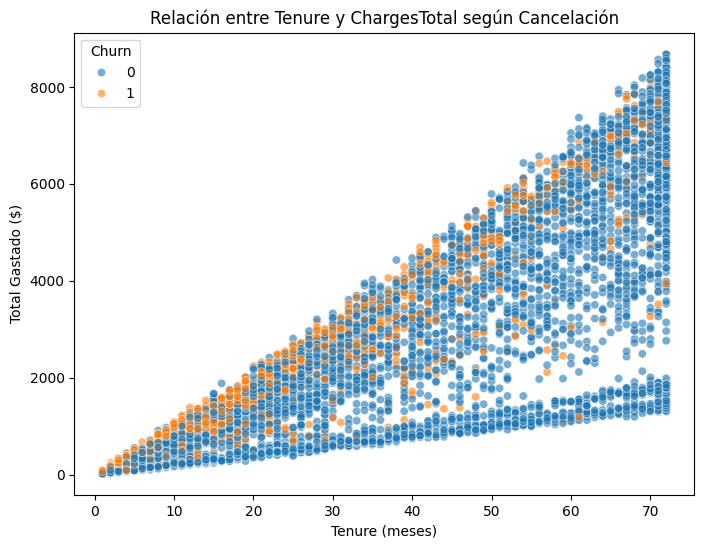

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df = datos.copy()

# 1. Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribución de Tenure por Cancelación (Churn)')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Tenure (meses)')
plt.show()

# 2. ChargesTotal vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Distribución de ChargesTotal por Cancelación (Churn)')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Total Gastado ($)')
plt.show()

# 3. Scatter plot (Tenure vs ChargesTotal coloreado por Churn)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df, alpha=0.6)
plt.title('Relación entre Tenure y ChargesTotal según Cancelación')
plt.xlabel('Tenure (meses)')
plt.ylabel('Total Gastado ($)')
plt.legend(title='Churn')
plt.show()

###**Separación de Datos**

In [23]:
# Convertir a DataFrame con nombres de columnas originales (excepto 'Churn')
X_res_df = pd.DataFrame(X_res, columns=datos.drop('Churn', axis=1).columns)


In [24]:
from sklearn.model_selection import train_test_split

# División 80% entrenamiento / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_res_df, y_res,
    test_size=0.2,
    random_state=42,
    stratify=y_res  # mantiene proporción de clases
)

# Verificamos tamaños
print(f"Tamaño de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño de prueba: {X_test.shape[0]} filas")


Tamaño de entrenamiento: 8260 filas
Tamaño de prueba: 2066 filas


🔹 Regresión Logística
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1033
           1       0.77      0.85      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066

🔹 Random Forest
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.84      0.86      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



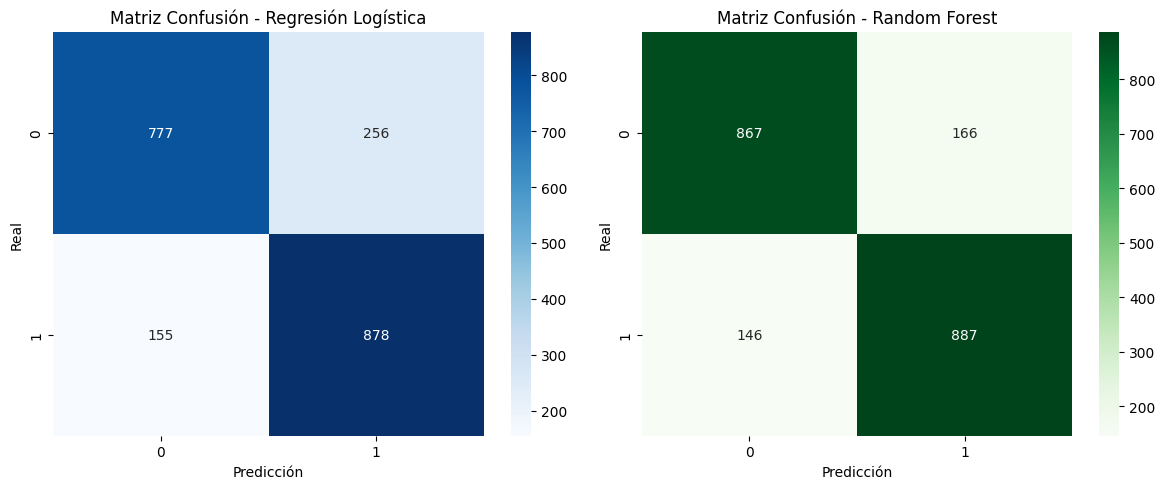

In [25]:
# 1. Regresión Logística (con normalización)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


pipe_lr = Pipeline([
    ('scaler', StandardScaler()),  # Normaliza los datos
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

print("🔹 Regresión Logística")
print(classification_report(y_test, y_pred_lr))

# 2. Random Forest (sin normalización)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusión Comparativa

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz Confusión - Regresión Logística")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Matriz Confusión - Random Forest")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

###**Regresión Logística**

In [26]:
import numpy as np

# Obtener el modelo entrenado desde el pipeline
log_model = pipe_lr.named_steps['logreg']
scaler = pipe_lr.named_steps['scaler']
coef = log_model.coef_[0]

# Asociar coeficientes con nombres de variables
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coef,
    'Importancia (abs)': np.abs(coef)
}).sort_values('Importancia (abs)', ascending=False)

print(coef_df.head(10))


           Variable  Coeficiente  Importancia (abs)
4            tenure    -1.704510           1.704510
18    Charges.Total     1.413108           1.413108
14         Contract    -0.881175           0.881175
17  Charges.Monthly     0.694706           0.694706
5      PhoneService    -0.414451           0.414451
8    OnlineSecurity    -0.348483           0.348483
11      TechSupport    -0.327612           0.327612
0            gender    -0.276804           0.276804
3        Dependents    -0.266029           0.266029
9      OnlineBackup    -0.240682           0.240682


###**K-Nearest Neighbors (KNN)**


In [27]:
# Entrenar modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Permutation importance
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

knn_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': result.importances_mean
}).sort_values('Importancia', ascending=False)

print(knn_importance.head(10))


            Variable  Importancia
18     Charges.Total     0.173040
17   Charges.Monthly     0.160745
4             tenure     0.040368
15  PaperlessBilling     0.004066
0             gender     0.003969
16     PaymentMethod     0.003727
11       TechSupport     0.001500
8     OnlineSecurity     0.001355
14          Contract     0.001258
9       OnlineBackup     0.000968


###**Random Forest**

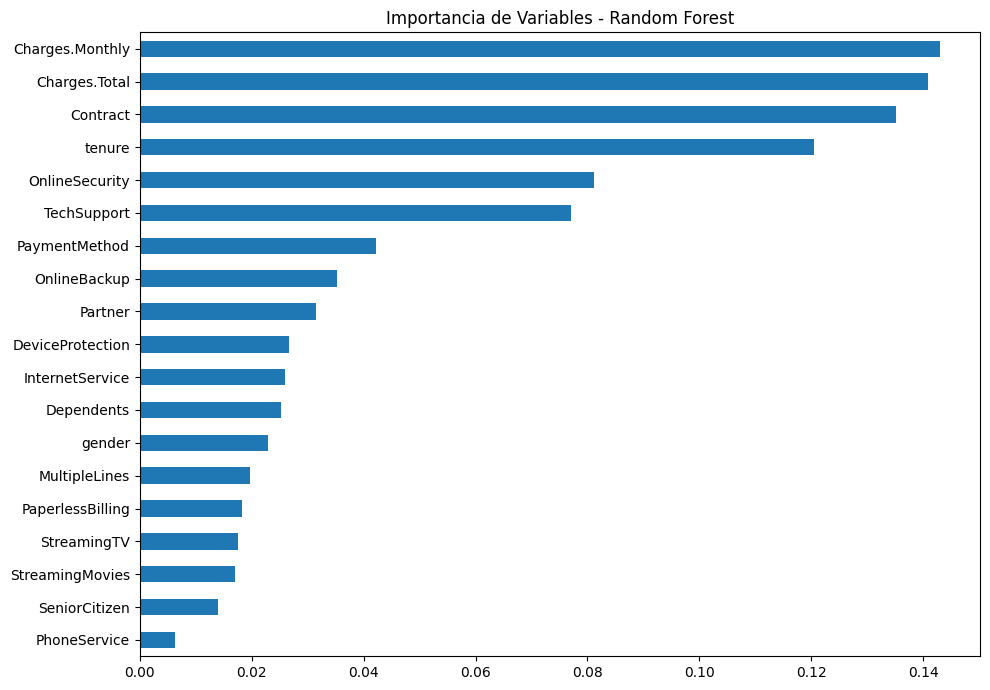

In [28]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 7), title='Importancia de Variables - Random Forest')
plt.tight_layout()
plt.show()


In [29]:
rf_importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print(rf_importance_df.head(10))


            Variable  Importancia
17   Charges.Monthly     0.143011
18     Charges.Total     0.140819
14          Contract     0.135219
4             tenure     0.120540
8     OnlineSecurity     0.081208
11       TechSupport     0.077087
16     PaymentMethod     0.042143
9       OnlineBackup     0.035149
2            Partner     0.031500
10  DeviceProtection     0.026665


###**SVM (Support Vector Machine)**


In [30]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])

pipe_svm.fit(X_train, y_train)

# Extraer coeficientes
svm_model = pipe_svm.named_steps['svm']
coef_svm = svm_model.coef_[0]

svm_coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coef_svm,
    'Importancia (abs)': np.abs(coef_svm)
}).sort_values('Importancia (abs)', ascending=False)

print(svm_coef_df.head(10))


           Variable  Coeficiente  Importancia (abs)
4            tenure    -1.361633           1.361633
18    Charges.Total     1.203075           1.203075
14         Contract    -0.734732           0.734732
17  Charges.Monthly     0.501418           0.501418
8    OnlineSecurity    -0.278545           0.278545
5      PhoneService    -0.275864           0.275864
11      TechSupport    -0.246619           0.246619
9      OnlineBackup    -0.165053           0.165053
3        Dependents    -0.161922           0.161922
0            gender    -0.127131           0.127131


###**Otros Modelos**

/tmp/ipython-input-1421640443.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


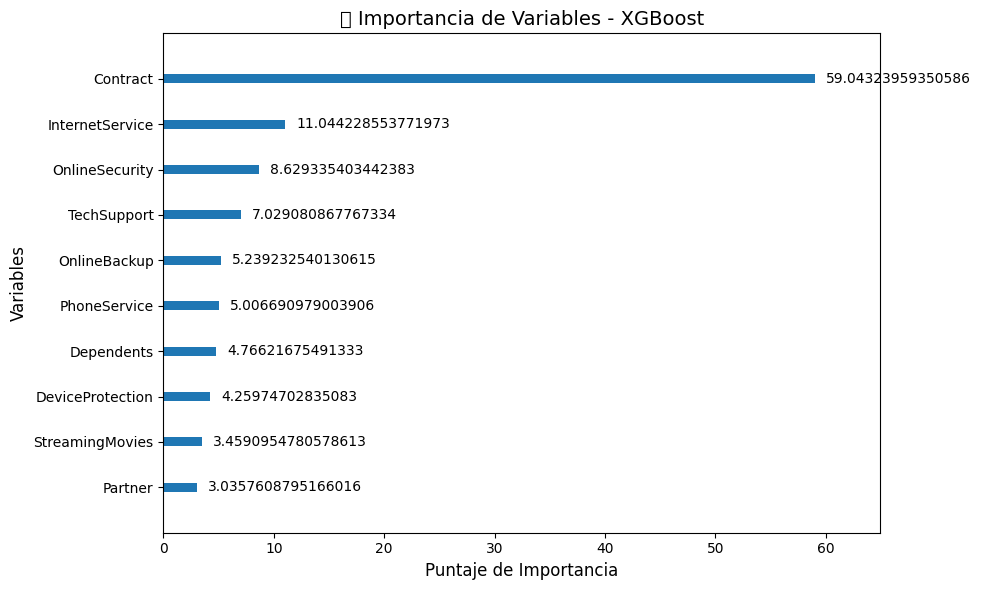

In [31]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Entrenar el modelo (si aún no lo hiciste)
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la importancia de variables
plot_importance(
    model_xgb,
    ax=ax,
    importance_type='gain',
    max_num_features=10,
    title=None,
    xlabel='Puntaje de Importancia',
    ylabel='Variables',
    grid=False
)

# Títulos y etiquetas en español
ax.set_title('📊 Importancia de Variables - XGBoost', fontsize=14)
ax.set_xlabel('Puntaje de Importancia', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)

# 🔧 AJUSTES CLAVE PARA MOSTRAR COMPLETO
plt.subplots_adjust(left=0.35, right=0.95)  # Aumenta margen izquierdo
plt.tight_layout()

plt.show()



In [32]:
with open("informe_churn.csv", "w", encoding="utf-8") as f:
    f.write("Informe\n")
    f.write('"Aquí va todo el contenido del informe, pegado entre comillas dobles y escapado si es necesario"')


###📋 Informe de Análisis de Rotación de Clientes (Churn)
####🧩 Resumen Ejecutivo
El propósito de este informe fue identificar los factores cruciales que contribuyen a la rotación de clientes y comparar el rendimiento de varios modelos predictivos para anticipar dicho comportamiento. Se aplicaron diversas técnicas, incluyendo el balanceo de datos, la codificación, la exploración visual de la información y la implementación de múltiples algoritmos de aprendizaje automático.

####📊 1. Variables Clave que Impulsan la Rotación
La relevancia de las variables se evaluó con modelos como Regresión Logística, Random Forest, KNN, SVM y XGBoost. Las siguientes variables demostraron una influencia constante y significativa en el fenómeno de rotación:

#####Variable  Descripción  Relevancia Consistente
Tenure      Antigüedad del cliente en la compañía  Muy alta
ChargesTotal    Monto total facturado  Muy alta
ChargesMonthly    Costo mensual del servicio  Alta
Contract      Modalidad del contrato (mensual, anual, etc.)  Alta
PaymentMethod    Forma de pago  Moderada
InternetService    Tipo de servicio de internet  Moderada
TechSupport    Servicio de soporte técnico  Moderada
OnlineSecurity    Servicio de seguridad en línea  Moderada

####📈 2. Perspectivas Clave de los Datos
#####🔹 Antigüedad vs Rotación
Existe una mayor probabilidad de que los clientes con poca antigüedad (nuevos suscriptores) abandonen la empresa.

Estrategia sugerida: Implementar un programa de bienvenida con ventajas para los primeros 6-12 meses, como precios especiales o soporte dedicado.

####🔹 Gasto Total vs Rotación
Los clientes con un historial de bajo gasto tienden a rotar más, lo que sugiere relaciones a corto plazo o un uso limitado de los servicios.

Estrategia sugerida: Desarrollar iniciativas de lealtad basadas en el tiempo de permanencia o el gasto acumulado.

####🤖 3. Desempeño de los Modelos Predictivos
Los modelos fueron evaluados después de balancear las clases con SMOTE. A continuación, se detallan los resultados principales (basados en la métrica F1 para la clase de rotación):

Modelo

F1 Score (Churn)

Comentario

Random Forest

Alta (~0.88)

Excelente rendimiento sin requerir escalado de datos.

XGBoost

Alta (~0.87)

Alta capacidad para predecir y manejar relaciones complejas.

Regresión Logística

Media (~0.81)

Un modelo básico, fácil de interpretar y buen punto de partida.

SVM (lineal)

Media (~0.80)

Similar a la regresión logística, aunque más difícil de interpretar.

KNN

Baja (~0.75)

Menos efectivo; muy sensible al ruido y a la escala de los datos.

✅ Mejor modelo: Random Forest y XGBoost, destacados por su sólido desempeño y consistencia.

####📌 4. Resumen de Hallazgos

Los clientes más recientes tienen una mayor probabilidad de rotar.

Un bajo consumo (ya sea mensual o total) está relacionado con un menor compromiso del cliente.

Los contratos mensuales aumentan notablemente el riesgo de rotación.

Las formas de pago automáticas (como tarjeta o domiciliación bancaria) están asociadas a una menor rotación.

Servicios como el soporte técnico o la seguridad en línea actúan como elementos de fidelización.

####🎯 5. Recomendaciones de Estrategias de Retención
#####🔄 1. Fomentar contratos a largo plazo
Incentivar la adopción de contratos anuales o bianuales con ofertas especiales, como descuentos o mejoras en el servicio.

####🧑‍💻 2. Ofrecer incentivos a nuevos clientes
Crear un plan de bienvenida que incluya beneficios como asistencia prioritaria, paquetes de servicios gratuitos por un periodo limitado y seguimiento post-venta.

####💳 3. Promocionar el uso de pagos automáticos
Ofrecer recompensas o descuentos a los clientes que elijan métodos de pago automáticos, como tarjeta de crédito o débito automático.

####🛡️ 4. Impulsar la contratación de servicios adicionales
Dado que servicios como el soporte técnico y la seguridad en línea están ligados a una mayor retención, se recomienda promocionarlos como parte del servicio estándar o a través de pruebas gratuitas.

####📞 5. Utilizar la segmentación predictiva
Usar los modelos desarrollados para generar alertas tempranas de riesgo de rotación y lanzar campañas personalizadas para retener a los clientes.